In [1]:
cd /home/ubuntu/FedEM/

/home/ubuntu/FedEM


In [2]:
# Import General Libraries
import os
import argparse
import torch
import copy
import pickle
import random
import numpy as np
import pandas as pd

# Import FedEM based Libraries
from utils.utils import *
from utils.constants import *
from utils.args import *
from run_experiment import *
from models import *

# Import Transfer Attack
from transfer_attacks.Personalized_NN import *
from transfer_attacks.Params import *
from transfer_attacks.Transferer import *
from transfer_attacks.Args import *
from transfer_attacks.TA_utils import *
from transfer_attacks.Boundary_Transferer import *

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})


In [3]:
# Generating Empty Aggregator to be loaded 

setting = 'FedEM'

if setting == 'FedEM':
    nL = 3
else:
    nL = 1
    
# Manually set argument parameters
args_ = Args()
args_.experiment = "cifar10"
args_.method = setting
args_.decentralized = False
args_.sampling_rate = 1.0
args_.input_dimension = None
args_.output_dimension = None
args_.n_learners= nL
args_.n_rounds = 10
args_.bz = 128
args_.local_steps = 1
args_.lr_lambda = 0
args_.lr =0.03
args_.lr_scheduler = 'multi_step'
args_.log_freq = 10
args_.device = 'cuda'
args_.optimizer = 'sgd'
args_.mu = 0
args_.communication_probability = 0.1
args_.q = 1
args_.locally_tune_clients = False
args_.seed = 1234
args_.verbose = 1
args_.save_path = 'weights/cifar/dummy/'
args_.validation = False

# Generate the dummy values here
try:
    aggregator
except:
    aggregator, clients = dummy_aggregator(args_, num_user=40)

try:
    dataloader
except:
    # Compiling Dataset from Clients
    # Combine Validation Data across all clients as test
    data_x = []
    data_y = []

    for i in range(len(clients)):
        daniloader = clients[i].test_iterator
        for (x,y,idx) in daniloader.dataset:
            data_x.append(x)
            data_y.append(y)

    data_x = torch.stack(data_x)
    try:
        data_y = torch.stack(data_y)        
    except:
        data_y = torch.FloatTensor(data_y) 

    dataloader = Custom_Dataloader(data_x, data_y)
    global_dataloader = copy.deepcopy(dataloader)
    
# del aggregator, clients

==> Clients initialization..
===> Building data iterators..


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 195.45it/s]


===> Initializing clients..


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:42<00:00,  1.90it/s]


==> Test Clients initialization..
===> Building data iterators..


0it [00:00, ?it/s]


===> Initializing clients..


0it [00:00, ?it/s]


++++++++++++++++++++++++++++++
Global..
Train Loss: 2.292 | Train Acc: 12.195% |Test Loss: 2.292 | Test Acc: 12.291% |
++++++++++++++++++++++++++++++++++++++++++++++++++
################################################################################


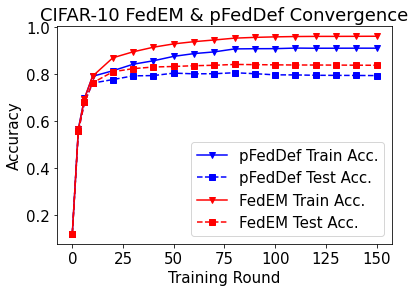

In [13]:
base_name1 = 'weights/SI/cifar10/23_01_05_SI_convergence/'
base_name2 = 'weights/SI/cifar10/23_01_06_SI_convergence/'

name_sub = [ 'FedEM_adv/', 'FedEM/']
color = ['blue', 'red']
train_label = [ 'pFedDef Train Acc.','FedEM Train Acc.']
test_label = ['pFedDef Test Acc.','FedEM Test Acc.']

for i in range(len(name_sub)):
    name = name_sub[i]
    pickle_name = base_name1 + name + 'train_log.p'
    with open(pickle_name,'rb') as handle:
        b = pickle.load(handle)
    
    x = b['rounds']
    y1 = b['train_acc']
    y2 = b['test_acc']
    
    pickle_name = base_name2 + name + 'train_log.p'
    with open(pickle_name,'rb') as handle:
        b = pickle.load(handle)
    
    x = [x[0]] + b['rounds'][1:3] + x[1:]
    y1 = [y1[0]] + b['train_acc'][1:3] + y1[1:]
    y2 = [y2[0]] + b['test_acc'][1:3] + y2[1:]
    
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

    plt.rc('font', **font)

    plt.plot(x,y1, marker = 'v', color = color[i], label = train_label[i])
    plt.plot(x,y2, marker = 's', linestyle = '--', color = color[i], label = test_label[i])
    


    plt.legend(frameon=True)
    plt.xlabel('Training Round')
    plt.ylabel('Accuracy')
    plt.title("CIFAR-10 FedEM & pFedDef Convergence")